In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dpks.interpretation import BootstrapInterpreter

from sklearn.datasets import make_classification

/home/aaron/miniconda3/envs/dpks0.1.5/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_samples=100
n_features=50

In [3]:
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=5,
    n_classes=2,
    random_state=42,
    class_sep=1.5
)

In [4]:
from dpks.quant_matrix import QuantMatrix

import pandas as pd
import numpy as np

In [5]:
design_matrix = pd.read_csv(
    #"../tests/input_files/design_sepsis.tsv",
    "/home/aaron/projects/dpks/notebooks/ml_api/covid_design_matrix.tsv",
    sep="\t"
)

In [6]:
design_matrix = design_matrix.sort_values("group", ascending=False).reset_index(drop=True)

In [7]:
#design_matrix['sample_num'] = design_matrix.index.values

Now, we simulate 3 groups in the data so we can perform multiple rounds of explanations

In [8]:
# design_matrix['group'] = np.where(
#     design_matrix['sample_num'] < 50, 3, design_matrix['group']
# )

In [9]:
design_matrix['group'].value_counts()

group
2    406
1    281
Name: count, dtype: int64

In [10]:
qm = QuantMatrix(
    quantification_file="/home/aaron/projects/dpks/notebooks/ml_api/quantified_proteins.tsv", #../tests/input_files/data_sepsis.tsv",
    design_matrix_file=design_matrix
)#.impute(method="uniform_percentile", percentile=0.1)
# ).filter().normalize(
#         method="mean",
#         use_rt_sliding_window_filter=True,
#         rt_unit="second",
#         stride=5,
#         minimum_data_points=200,
#     ).quantify(method="maxlfq", top_n=5)

In [11]:
X, y = qm.to_ml()

In [12]:
n_samples=X.shape[0]
n_features=X.shape[1]

In [13]:
decoy_features = np.zeros(
    X.shape
)

for i in range(n_features):

    feature_slice = X.iloc[:, i]

    feature_mean = np.nanmean(feature_slice)
    feature_std = np.nanstd(feature_slice)

    decoy_feature = np.random.normal(
        loc=feature_mean,
        scale=feature_std,
        size=n_samples
    )

    decoy_features[:, i] = decoy_feature

In [14]:
# X = pd.DataFrame(
#     X,
#     columns=[str(i) for i in range(X.shape[1])]
# )

decoy_features = pd.DataFrame(
    decoy_features,
    columns=[f"decoy_{i}" for i in X.columns]
)

In [15]:
decoy_features

,decoy_P00747,decoy_P02787,decoy_P02675,decoy_P01024,decoy_P13671,decoy_P10643,decoy_P04003,decoy_A0A0C4DH39,decoy_P43652,decoy_P01042,...,decoy_P01764,decoy_P0DP08,decoy_A0A0B4J1V1,decoy_P01763,decoy_P07996,decoy_P04264,decoy_O95497,decoy_P01767,decoy_P30041,decoy_P02745
0,5.821104,8.398960,9.363315,8.135564,5.121762,5.639303,6.171539,5.840350,5.528545,4.110815,...,6.393091,4.821417,6.794629,5.666905,4.455418,3.848092,3.794221,8.708988,1.964276,8.480447
1,7.046124,8.898441,9.121422,8.075511,5.214925,5.937400,7.077050,3.180551,5.721323,4.467578,...,6.157759,5.634239,6.384249,6.152328,4.545925,4.513053,3.886440,6.248418,1.941357,6.575730
2,6.501169,7.550113,8.411467,8.370582,5.078524,6.125645,7.539593,2.587664,6.253171,4.832529,...,5.952599,5.335043,6.191201,5.506559,3.199960,3.977110,3.827683,9.493798,1.397846,6.896159
3,6.559273,8.074132,8.744191,7.705557,5.354970,5.654827,6.278045,3.021610,5.701010,4.137612,...,5.550451,4.812547,5.534287,4.997773,5.107762,3.895407,4.117315,8.097735,3.254336,5.411984
4,6.982851,7.955228,8.487759,8.245867,5.450758,5.678445,6.939535,3.295350,6.331794,4.032097,...,6.289678,5.495877,5.743506,5.548146,4.987084,3.054992,3.377310,5.978548,1.558843,6.067325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,6.605204,8.860153,8.077052,8.011158,5.503799,5.233818,6.740288,3.604927,5.675221,4.460579,...,4.834545,5.050653,7.008696,5.885256,4.159182,2.585534,3.778738,6.726572,2.489376,6.771852
683,6.217207,7.973683,8.829285,8.026723,5.271752,6.438741,6.890280,6.327342,5.232012,4.507950,...,5.849631,4.536941,7.197539,6.239223,3.695425,3.620988,6.111914,5.226191,3.994419,6.311957
684,6.701641,8.365946,9.519457,8.293253,5.081162,5.486042,7.307760,6.974699,5.065482,5.040769,...,6.162682,5.380591,5.316707,7.233370,3.998439,4.763434,3.264538,8.707787,2.122764,5.305941
685,6.584426,8.319161,8.920238,8.107037,5.107789,5.624393,6.930657,2.972417,5.570864,3.836742,...,6.186386,5.284143,4.638265,6.845738,3.784111,3.765753,3.339126,5.158418,2.516156,6.233559


In [16]:
combined_features = X.reset_index(drop=True).join(decoy_features)

In [17]:
# combined_features = pd.merge(
#     [X.reset_index(drop=True), decoy_features],
#     #axis=0
# )
combined_features.shape

(687, 378)

In [18]:
interpreter = BootstrapInterpreter(
    n_iterations=10,
    feature_names=combined_features.columns.values,
    downsample_background=False
)

In [19]:
import xgboost

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

In [20]:
from sklearn.model_selection import cross_val_score
from dpks.classification import Classifier

scores = cross_val_score(clf, combined_features, y, cv=5)
scores

array([0.80434783, 0.87681159, 0.89051095, 0.86131387, 0.87591241])

In [21]:
interpreter.fit(combined_features, y, clf)

In [22]:
importances = interpreter.importances.copy()

In [23]:
from scipy.stats import f_oneway

In [24]:
feature_pvalues = list()
feature_variance = list()
feature_mean_diffs = list()

for col in combined_features.columns:
    
    feature_values = combined_features.loc[:, col]
    feature_a_values = feature_values.values[np.argwhere(y['label'].values == 0).ravel()]
    feature_b_values = feature_values.values[np.argwhere(y['label'].values == 1).ravel()]

    feature_a_values = feature_a_values[feature_a_values > 0]
    feature_b_values = feature_b_values[feature_b_values > 0]
    
    feature_pvalues.append(f_oneway(
        feature_a_values,
        feature_b_values
    ).pvalue)

    feature_variance.append(np.nanvar(feature_values))

    # feature_class_correlation.append(np.correlate(
    #     np.sort(feature_values[np.argwhere(y == 0).ravel()]),
    #     np.sort(feature_values[np.argwhere(y == 1).ravel()])feature_class_correlation = list()
    # )[0])

    feature_mean_diffs.append(
        np.abs(np.mean(feature_a_values) - np.mean(feature_b_values))
    )


In [25]:
feature_stats = pd.DataFrame(
    {
        "feature": combined_features.columns.values,
        "pvalue": feature_pvalues,
        "variance": feature_variance,
        #"correlation": feature_class_correlation,
        "feature_diff": feature_mean_diffs
    }  
)

In [26]:
importances = importances.set_index("feature").join(
    feature_stats.set_index("feature")
)
importances

,iteration_0_shap,iteration_0_rank,iteration_1_shap,iteration_1_rank,iteration_2_shap,iteration_2_rank,iteration_3_shap,iteration_3_rank,iteration_4_shap,iteration_4_rank,...,iteration_9_rank,mean_shap,median_shap,stdev_shap,mean_rank,median_rank,stdev_rank,pvalue,variance,feature_diff
feature,,,,,,,,,,,,,,,,,,,,,
P00747,0.000000,253.5,0.000000,264.0,0.000000,258.5,0.070830,63.0,0.000000,248.5,...,242.5,0.007083,0.000000,0.022398,235.55,253.50,60.959663,1.245620e-02,0.096795,0.060304
P02787,0.000000,253.5,0.000000,264.0,0.000000,258.5,0.000000,252.0,0.000000,248.5,...,242.5,0.000000,0.000000,0.000000,254.45,253.50,6.409411,6.481507e-09,0.135917,0.164317
P02675,0.000000,253.5,0.063896,78.0,0.067461,48.0,0.000000,252.0,0.000000,248.5,...,242.5,0.023751,0.000000,0.039806,193.65,250.00,93.823134,5.855207e-02,0.299254,0.080338
P01024,0.122854,28.0,0.298916,10.0,0.160514,17.0,0.279406,14.0,0.285752,9.0,...,10.0,0.237685,0.282161,0.083360,16.60,12.50,10.500794,1.736267e-09,0.111362,0.154151
P13671,0.000000,253.5,0.035988,120.0,0.028666,99.0,0.010173,124.0,0.012356,118.0,...,242.5,0.018096,0.005086,0.029612,177.80,183.25,82.700665,2.734046e-04,0.102331,0.090069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
decoy_P04264,0.000000,253.5,0.095557,54.0,0.000000,258.5,0.000000,252.0,0.000000,248.5,...,242.5,0.017592,0.000000,0.037261,213.80,251.75,81.764635,7.064974e-01,0.389081,0.018260
decoy_O95497,0.000000,253.5,0.000000,264.0,0.000000,258.5,0.000000,252.0,0.000000,248.5,...,242.5,0.000000,0.000000,0.000000,254.45,253.50,6.409411,5.290474e-01,0.527475,0.035535
decoy_P01767,0.037890,86.0,0.000000,264.0,0.047521,64.0,0.000000,252.0,0.000000,248.5,...,65.0,0.025017,0.000000,0.037666,179.35,250.00,99.711542,2.451018e-01,1.291169,0.102627


In [27]:
importances = importances.reset_index()

In [28]:
first_test_columns = [
    'mean_shap',
    #'median_shap',
    'stdev_shap',
    'mean_rank',
    #'median_rank',
    'stdev_rank',
    'pvalue',
    "variance",
    "feature_diff",
    #"correlation"
]

In [29]:
X_importances = importances[first_test_columns].copy()
y = np.where(
    importances['feature'].str.contains("decoy"), 0, 1
)

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

X_importances[X_importances.columns] = scaler.fit_transform(
    X_importances[X_importances.columns]
)

In [32]:
X_importances

,mean_shap,stdev_shap,mean_rank,stdev_rank,pvalue,variance,feature_diff
0,0.009259,0.082376,0.925104,0.491108,1.245852e-02,0.003578,0.024064
1,0.000000,0.000000,1.000000,0.040934,6.482714e-09,0.011828,0.065582
2,0.031046,0.146397,0.759065,0.762312,5.856297e-02,0.046271,0.032061
3,0.310694,0.306575,0.057460,0.074698,1.736590e-09,0.006650,0.061524
4,0.023654,0.108906,0.696255,0.670524,2.734555e-04,0.004745,0.035945
...,...,...,...,...,...,...,...
373,0.022996,0.137035,0.838914,0.662800,7.066290e-01,0.065214,0.007281
374,0.000000,0.000000,1.000000,0.040934,5.291459e-01,0.094397,0.014177
375,0.032701,0.138527,0.702397,0.810906,2.451475e-01,0.255441,0.040957
376,0.013994,0.093119,0.864276,0.573139,4.158742e-01,0.138079,0.021316


In [33]:
from sklearn.model_selection import cross_val_score
from dpks.classification import Classifier

clf = Classifier(
    xgboost.XGBClassifier(
        max_depth=2,
        #subsample=0.5,
        reg_lambda=2,
        objective="binary:logistic",
        seed=42
    )
)

scores = cross_val_score(clf, X_importances, y, cv=3)
scores

array([0.85714286, 0.79365079, 0.78571429])

In [34]:
clf.fit(X_importances, y)

feature_importances = pd.DataFrame({
"feature": X_importances.columns,
    "shap": clf.feature_importances_
}
    
)

feature_importances

,feature,shap
0,mean_shap,0.333538
1,stdev_shap,0.477479
2,mean_rank,0.400582
3,stdev_rank,0.189151
4,pvalue,1.232121
5,variance,0.770858
6,feature_diff,2.404981


In [35]:
from sklearn.linear_model import LogisticRegression


clf = xgboost.XGBClassifier(
        max_depth=2,
        #subsample=0.5,
        reg_lambda=2,
        objective="binary:logistic",
        seed=42
    )

#clf = LogisticRegression()


In [36]:
from sklearn.model_selection import cross_val_predict

feature_scores = cross_val_predict(
    clf,
    X_importances,
    y,
    cv=5,
    method='predict_proba'
)[:, 1]

In [37]:
feature_score_results = pd.DataFrame(
    {
        'feature_name': importances['feature'],
        'label': y,
        'feature_score': np.log(feature_scores/(1 - feature_scores))
    }
)

In [38]:
feature_score_results.sort_values("feature_score", ascending=False).head(25)

,feature_name,label,feature_score
182,P01763,1,9.250205
23,P05543,1,8.309011
170,Q6EMK4,1,7.916504
22,P01023,1,7.908035
31,P36955,1,7.747310
87,P22792,1,7.584618
161,P06331,1,7.541758
52,P27169,1,7.465963
114,P00740,1,7.321704
18,P02749,1,7.236915


<Axes: xlabel='feature_score', ylabel='Count'>

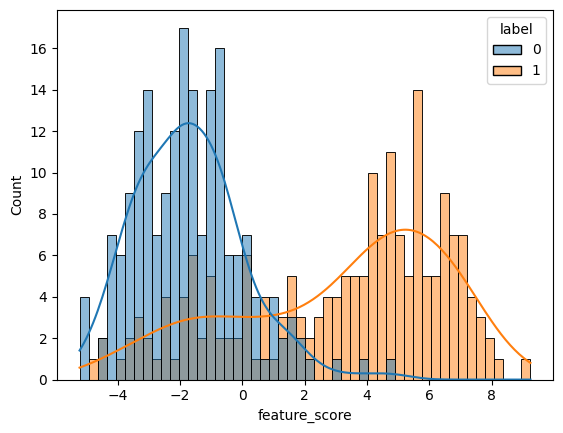

In [39]:
sns.histplot(
    data=feature_score_results,
    x="feature_score",
    hue="label",
    bins=50,
    kde=True
)

In [40]:
from dpks.fdr import DecoyCounter, ScoreDistribution

decoy_counter = DecoyCounter()

feature_score_results['q_value'] = decoy_counter.q_values(
    feature_score_results['feature_score'], feature_score_results['label']
)

score_dist = ScoreDistribution()
score_dist.fit(
    feature_score_results['feature_score'].values, feature_score_results['label']
)
feature_score_results['q_value'] = score_dist.q_values(
    feature_score_results['feature_score']
)

/home/aaron/miniconda3/envs/dpks0.1.5/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [41]:
feature_score_results.sort_values("q_value").head(10)

,feature_name,label,feature_score,q_value
101,Q14624,1,6.412206,0.0
22,P01023,1,7.908035,0.0
23,P05543,1,8.309011,0.0
161,P06331,1,7.541758,0.0
105,Q9NZP8,1,7.211846,0.0
27,P01019,1,6.731353,0.0
178,A0A075B6R2,1,7.146622,0.0
182,P01763,1,9.250205,0.0
99,A0A0C4DH31,1,6.905218,0.0
31,P36955,1,7.747310,0.0


In [42]:
feature_score_results[feature_score_results['q_value']<= 0.01]

,feature_name,label,feature_score,q_value
1,P02787,1,6.495939,0.000000
3,P01024,1,6.022080,0.000525
5,P10643,1,6.398420,0.000000
7,A0A0C4DH39,1,5.742916,0.001524
8,P43652,1,5.070466,0.005209
...,...,...,...,...
184,P04264,1,4.776028,0.007122
185,O95497,1,7.146622,0.000000
187,P30041,1,4.568915,0.008568
188,P02745,1,4.747077,0.007244


In [43]:
feature_score_results.sort_values("feature_score", ascending=False)

,feature_name,label,feature_score,q_value
182,P01763,1,9.250205,0.000000
23,P05543,1,8.309011,0.000000
170,Q6EMK4,1,7.916504,0.000000
22,P01023,1,7.908035,0.000000
31,P36955,1,7.747310,0.000000
...,...,...,...,...
76,P03950,1,-4.863019,0.499582
229,decoy_P02765,0,-4.935648,0.502721
299,decoy_A0A0B4J1X8,0,-4.967382,0.502581
285,decoy_A0A0B4J1Y8,0,-5.002844,0.504116


In [82]:
all_columns = [col for col in importances.columns if col != "feature"]

In [83]:
X_importances = importances[all_columns].copy()
y = np.where(
    importances['feature'].str.contains("decoy"), 0, 1
)

In [84]:
scaler = MinMaxScaler()

X_importances[X_importances.columns] = scaler.fit_transform(
    X_importances[X_importances.columns]
)

In [85]:
from sklearn.model_selection import cross_val_score

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

scores = cross_val_score(clf, X_importances, y, cv=3)
scores

array([0.94444444, 0.96031746, 0.96031746])

In [86]:
from sklearn.model_selection import cross_val_predict

feature_scores = cross_val_predict(
    clf,
    X_importances,
    y,
    cv=3,
    method='predict_proba'
)[:, 1]

In [87]:
feature_score_results = pd.DataFrame(
    {
        'feature_name': importances['feature'],
        'label': y,
        'feature_score': np.log(feature_scores/(1 - feature_scores))
    }
)

<Axes: xlabel='feature_score', ylabel='Count'>

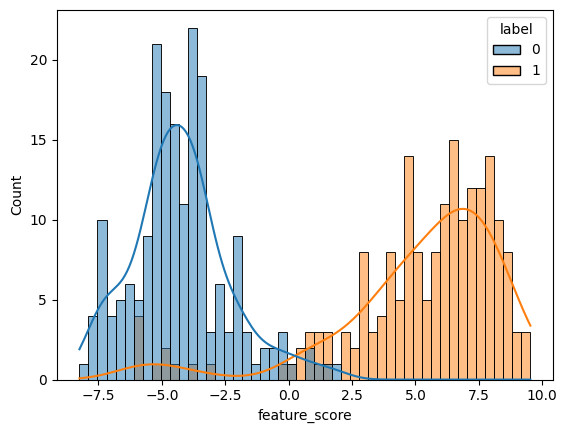

In [88]:
sns.histplot(
    data=feature_score_results,
    x="feature_score",
    hue="label",
    bins=50, 
    kde=True
)

In [81]:
from dpks.fdr import DecoyCounter, ScoreDistribution

decoy_counter = DecoyCounter()

feature_score_results['q_value'] = decoy_counter.calc_q_values(
    feature_score_results['feature_score'], feature_score_results['label']
)

# score_distribution = ScoreDistribution()
# score_distribution.fit(feature_score_results['feature_score'].values, feature_score_results['label'].ravel())
# feature_score_results['q_value'] = score_distribution.calculate_q_values(
#     feature_score_results['feature_score']
# )

In [83]:
feature_score_results.sort_values("q_value").head(15)

,feature_name,label,feature_score,q_value
31,P36955,1,6.698006,0.000000
181,A0A0B4J1V1,1,6.607372,0.000000
185,O95497,1,7.091609,0.000000
104,Q9Y490,1,6.942913,0.000000
102,A0A0B4J1Y9,1,7.970609,0.000000
83,Q68DL7,1,7.229476,0.000000
129,P02671,1,6.691295,0.000000
53,P51884,1,3.543287,0.010638
157,P01601,1,3.553112,0.010753
21,P07357,1,3.669851,0.010870


In [84]:
feature_score_results[feature_score_results['q_value']<= 0.01]

,feature_name,label,feature_score,q_value
31,P36955,1,6.698006,0.0
83,Q68DL7,1,7.229476,0.0
102,A0A0B4J1Y9,1,7.970609,0.0
104,Q9Y490,1,6.942913,0.0
129,P02671,1,6.691295,0.0
181,A0A0B4J1V1,1,6.607372,0.0
185,O95497,1,7.091609,0.0


In [57]:
feature_stats[feature_stats['pvalue'] <= 0.1]

,feature,pvalue,variance,correlation,feature_diff
0,P00747,1.494271e-02,0.096795,23521.305712,0.030152
1,P02787,1.232473e-08,0.135917,39962.543779,0.082159
3,P01024,3.293311e-02,0.111362,33016.291714,0.077076
4,P13671,6.157188e-04,0.102331,14186.332759,0.045035
5,P10643,4.569501e-06,0.263885,17553.192617,0.106419
...,...,...,...,...,...
250,decoy_P05109,8.966535e-02,2.993094,17574.243405,0.121551
269,decoy_Q15848,8.346383e-02,2.227106,6458.362041,0.118352
299,decoy_A0A0B4J1X8,1.743133e-02,2.326910,18529.954406,0.145685
365,decoy_P01871,3.037256e-02,4.077021,14781.034849,0.217261


In [58]:
top10 = interpreter.select_features(
    top_n=10,
    percent=1.0,
    method="count",
)
top10_counts = interpreter.feature_counts.copy()
top10_counts = top10_counts.rename(
    columns={"count": "top10_count"}
)
top10_counts

,feature,top10_count
0,P06396,1.00
1,P25311,0.99
2,P02760,0.92
3,P05109,0.84
4,P01833,0.53
...,...,...
77,decoy_A0A0B4J1X8,0.01
78,A0A0C4DH33,0.01
79,decoy_P55056,0.01
80,decoy_A0A075B6J1,0.01


In [59]:
top25 = interpreter.select_features(
    top_n=25,
    percent=1.0,
    method="count",
)
top25_counts = interpreter.feature_counts.copy()
top25_counts = top25_counts.rename(
    columns={"count": "top25_count"}
)
top25_counts

,feature,top25_count
0,P06396,1.00
1,P02760,1.00
2,P25311,1.00
3,P05109,0.94
4,P04180,0.81
...,...,...
187,decoy_P51884,0.01
188,decoy_P06727,0.01
189,P01880,0.01
190,P01780,0.01


In [60]:
importances = importances.set_index("feature").join(
    top10_counts.set_index("feature")
)
importances = importances.join(
    top25_counts.set_index("feature")
)
importances = importances.reset_index()
importances

,feature,iteration_0_shap,iteration_0_rank,iteration_1_shap,iteration_1_rank,iteration_2_shap,iteration_2_rank,iteration_3_shap,iteration_3_rank,iteration_4_shap,...,stdev_shap,mean_rank,median_rank,stdev_rank,pvalue,variance,correlation,feature_diff,top10_count,top25_count
0,P00747,0.000000,255.0,0.000000,257.0,0.000000,253.0,0.051445,76.0,0.000000,...,0.024746,231.345,254.50,58.351283,1.494271e-02,0.096795,23521.305712,0.030152,NaN,NaN
1,P02787,0.120079,31.0,0.000000,257.0,0.070385,53.0,0.000000,250.5,0.000000,...,0.050687,197.320,252.50,87.668698,1.232473e-08,0.135917,39962.543779,0.082159,NaN,0.02
2,P02675,0.000000,255.0,0.000000,257.0,0.040231,74.0,0.000000,250.5,0.039600,...,0.025949,217.625,254.25,72.146399,2.628272e-01,0.299254,50786.647514,0.040169,NaN,NaN
3,P01024,0.211212,14.0,0.541160,8.0,0.161489,21.0,0.193591,18.0,0.259612,...,0.170307,18.990,13.00,18.230563,3.293311e-02,0.111362,33016.291714,0.077076,0.39,0.77
4,P13671,0.024483,106.0,0.000000,257.0,0.000000,253.0,0.000000,250.5,0.000000,...,0.036954,226.680,254.25,66.279730,6.157188e-04,0.102331,14186.332759,0.045035,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,decoy_P04264,0.000000,255.0,0.000000,257.0,0.000000,253.0,0.000000,250.5,0.000000,...,0.014304,238.580,254.50,47.391275,3.124112e-01,0.186809,37.374692,0.019023,NaN,NaN
374,decoy_O95497,0.036867,83.0,0.000000,257.0,0.000000,253.0,0.000000,250.5,0.000000,...,0.027817,218.110,253.50,71.166315,6.881863e-01,2.151720,3596.920214,0.038298,NaN,NaN
375,decoy_P01767,0.025020,103.0,0.142833,42.0,0.000000,253.0,0.032608,98.0,0.000000,...,0.069605,154.605,118.00,94.677717,2.064817e-01,11.073108,4501.352192,0.196166,NaN,0.08
376,decoy_P30041,0.000000,255.0,0.000000,257.0,0.000000,253.0,0.000000,250.5,0.000000,...,0.025350,243.500,254.50,44.074661,2.333545e-01,0.134044,32.219250,0.017553,NaN,NaN


In [61]:
importances[['top10_count', 'top25_count']] = importances[['top10_count', 'top25_count']].fillna(0.0)

In [62]:
all_columns = [col for col in importances.columns if col != "feature"]

In [63]:
X_importances = importances[all_columns].copy()
y = np.where(
    importances['feature'].str.contains("decoy"), 0, 1
)

In [64]:
scaler = MinMaxScaler()

X_importances[X_importances.columns] = scaler.fit_transform(
    X_importances[X_importances.columns]
)

In [65]:
from sklearn.model_selection import cross_val_score

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

scores = cross_val_score(clf, X_importances, y, cv=5)
scores

array([0.84210526, 0.77631579, 0.76315789, 0.77333333, 0.78666667])

In [66]:
from sklearn.model_selection import cross_val_predict

feature_scores = cross_val_predict(
    clf,
    X_importances,
    y,
    cv=5,
    method='predict_proba'
)[:, 1]

In [67]:
feature_score_results = pd.DataFrame(
    {
        'feature_name': importances['feature'],
        'label': y,
        'feature_score': np.log(feature_scores/(1 - feature_scores))
    }
)

<Axes: xlabel='feature_score', ylabel='Count'>

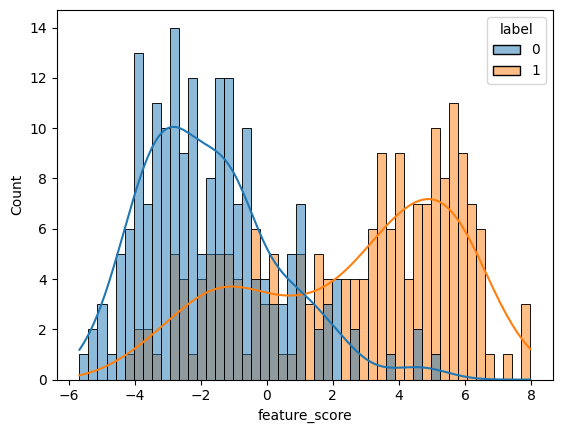

In [68]:
sns.histplot(
    data=feature_score_results,
    x="feature_score",
    hue="label",
    bins=50,
    kde=True
)

In [69]:
from dpks.fdr import DecoyCounter

decoy_counter = DecoyCounter()

feature_score_results['q_value'] = decoy_counter.calc_q_values(
    feature_score_results['feature_score'], feature_score_results['label']
)

In [70]:
# from dpks.fdr import ScoreDistribution

# score_dist = ScoreDistribution()

# score_dist.fit(feature_score_results['feature_score'].values, feature_score_results['label'].values)

# feature_score_results['q_value'] = score_dist.calculate_q_values(feature_score_results['feature_score'])

In [71]:
feature_score_results.sort_values("q_value").head(10)

,feature_name,label,feature_score,q_value
102,A0A0B4J1Y9,1,7.879889,0.0
35,P00918,1,6.074848,0.0
77,P18428,1,6.277279,0.0
39,P02750,1,6.373821,0.0
40,P02765,1,6.855932,0.0
41,P02760,1,5.876361,0.0
162,P48740,1,5.650722,0.0
43,P00742,1,7.944367,0.0
45,P08571,1,5.585175,0.0
46,P01833,1,6.383440,0.0


In [72]:
feature_score_results[feature_score_results['q_value']<= 0.01]

,feature_name,label,feature_score,q_value
1,P02787,1,5.849770,0.0
14,P08603,1,6.201719,0.0
18,P02749,1,7.978234,0.0
19,P02748,1,5.236446,0.0
22,P01023,1,5.546393,0.0
25,A0A075B6I1,1,5.364092,0.0
33,P01034,1,5.531204,0.0
35,P00918,1,6.074848,0.0
39,P02750,1,6.373821,0.0
40,P02765,1,6.855932,0.0


In [75]:
feature_score_results.sort_values("feature_score", ascending=False).head(10)

,feature_name,label,feature_score,q_value
18,P02749,1,7.978234,0.0
43,P00742,1,7.944367,0.0
102,A0A0B4J1Y9,1,7.879889,0.0
99,A0A0C4DH31,1,7.285092,0.0
40,P02765,1,6.855932,0.0
125,P00734,1,6.595318,0.0
92,P23083,1,6.566779,0.0
49,P02790,1,6.561945,0.0
50,Q08380,1,6.473228,0.0
46,P01833,1,6.383440,0.0


In [82]:
feature_score_results[feature_score_results['feature_name'] == "P06396"]

,feature_name,label,feature_score,q_value
17,P06396,1,5.137033,0.022121


In [211]:
import re
shap_column = re.compile('iteration_._shap')
rank_column = re.compile('iteration_._rank')



In [212]:
all_columns = [col for col in importances.columns if col != "feature" and (re.match(shap_column, col) or re.match(rank_column, col))]

In [214]:
X_importances = importances[all_columns].copy()
y = np.where(
    importances['feature'].str.contains("decoy"), 0, 1
)

In [215]:
scaler = MinMaxScaler()

X_importances[X_importances.columns] = scaler.fit_transform(
    X_importances[X_importances.columns]
)

In [216]:
from sklearn.model_selection import cross_val_score

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

scores = cross_val_score(clf, X_importances, y, cv=5)
scores

array([0.62612613, 0.56306306, 0.57207207, 0.58371041, 0.54298643])

In [217]:
from sklearn.model_selection import cross_val_predict

feature_scores = cross_val_predict(
    clf,
    X_importances,
    y,
    cv=5,
    method='predict_proba'
)[:, 1]

In [218]:
feature_score_results = pd.DataFrame(
    {
        'feature_name': importances['feature'],
        'label': y,
        'feature_score': np.log(feature_scores/(1 - feature_scores))
    }
)

<Axes: xlabel='feature_score', ylabel='Count'>

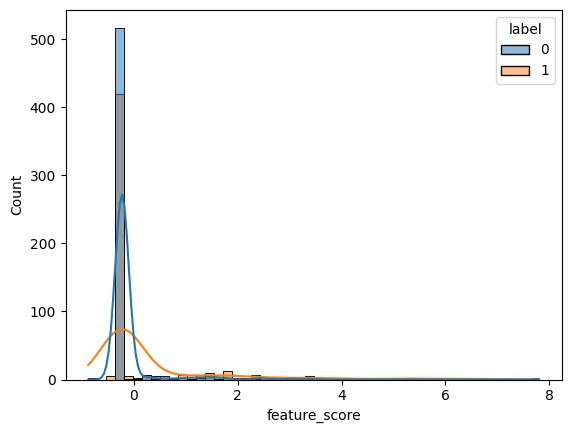

In [219]:
sns.histplot(
    data=feature_score_results,
    x="feature_score",
    hue="label",
    bins=50,
    kde=True
)

In [220]:
from dpks.fdr import DecoyCounter

decoy_counter = DecoyCounter()

feature_score_results['q_value'] = decoy_counter.calc_q_values(
    feature_score_results['feature_score'], feature_score_results['label']
)

In [221]:
# from dpks.fdr import ScoreDistribution

# score_dist = ScoreDistribution()

# score_dist.fit(feature_score_results['feature_score'].values, feature_score_results['label'].values)

# feature_score_results['q_value'] = score_dist.calculate_q_values(feature_score_results['feature_score'])

In [222]:
feature_score_results.sort_values("q_value").head(10)

,feature_name,label,feature_score,q_value
89,P00742,1,3.514226,0.0
340,P02654,1,6.938592,0.0
347,P08493,1,6.412497,0.0
380,Q6EMK4,1,7.120214,0.0
387,P01742,1,4.786363,0.0
98,P33151,1,5.083447,0.0
412,P35858,1,7.802390,0.0
182,Q9NZP8,1,7.184788,0.0
438,P22352,1,3.678231,0.0
35,P61626,1,5.228684,0.0


In [223]:
feature_score_results[feature_score_results['q_value']<= 0.01]

,feature_name,label,feature_score,q_value
19,P19823,1,5.391632,0.0
35,P61626,1,5.228684,0.0
39,Q04756,1,3.949562,0.0
41,P06727,1,5.407914,0.0
59,Q08380,1,6.234293,0.0
63,P19827,1,4.289401,0.0
78,P05362,1,6.234293,0.0
89,P00742,1,3.514226,0.0
98,P33151,1,5.083447,0.0
147,P08571,1,5.621173,0.0


In [225]:
feature_score_results.sort_values("feature_score", ascending=False)

,feature_name,label,feature_score,q_value
412,P35858,1,7.802390,0.000000
338,Q06033,1,7.798312,0.000000
182,Q9NZP8,1,7.184788,0.000000
380,Q6EMK4,1,7.120214,0.000000
340,P02654,1,6.938592,0.000000
...,...,...,...,...
399,Q8N6C8,1,-0.415670,0.501812
314,P12111,1,-0.510316,0.501357
351,P01765,1,-0.791552,0.500904
395,P14151,1,-0.875061,0.500452
